In [1]:
# Analyzing data

In [2]:
## Prison Helicopter Escapes

We begin by importing some helper functions.

In [3]:
from helper import *

In [4]:
## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

print(type(data))
    

<class 'list'>


Let's print the first three rows

In [6]:
for i in range(3):
    print(data[i])

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[5] It also inspired the 1975 action movie Breakout, 

Dropping the last column from all rows, to make the data more readable

In [7]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

print(data)

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], ['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont'], ['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)'], ['January, 1983', 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan'], ['December 19, 1985', 'Perry Correctional Institution, Pelzer, South Carolina', 'United States', 'Yes', 'James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith'], ['December 31, 1985', 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil', 'Yes', 'José Carlos dos Reis Encina, a.k.a. "

Fetching the year from date column

In [8]:
# Define the fetch_year function

In [9]:
def fetch_year(date_str):
    # Handle cases where the date is not in the standard 'Month day, year' format
    if ',' in date_str:
        return int(date_str.split(', ')[1])
    elif date_str.split()[-1].isdigit():
        return int(date_str.split()[-1])
    else:
        # Handle other formats or cases where date_str is not in expected format
        return None  # Or raise an exception, depending on your needs


In [10]:
for row in data:
    row[0] = fetch_year(row[0])
    
print(data[:5])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)']]


In [13]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

print(min_year)
print(max_year)

years = []
for year in range(min_year, max_year + 1):
    years.append(year)
    
year_counts = {}
for row in data:
    year = row[0]
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# Convert the year counts to a list of lists
attempts_per_year = [[year, count] for year, count in sorted(year_counts.items())]
print(attempts_per_year)
    

1971
2020
[[1971, 1], [1973, 1], [1978, 1], [1981, 2], [1983, 1], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1996, 1], [1997, 1], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2005, 2], [2006, 1], [2007, 3], [2009, 3], [2010, 1], [2012, 1], [2013, 2], [2014, 1], [2016, 1], [2018, 1], [2020, 1]]


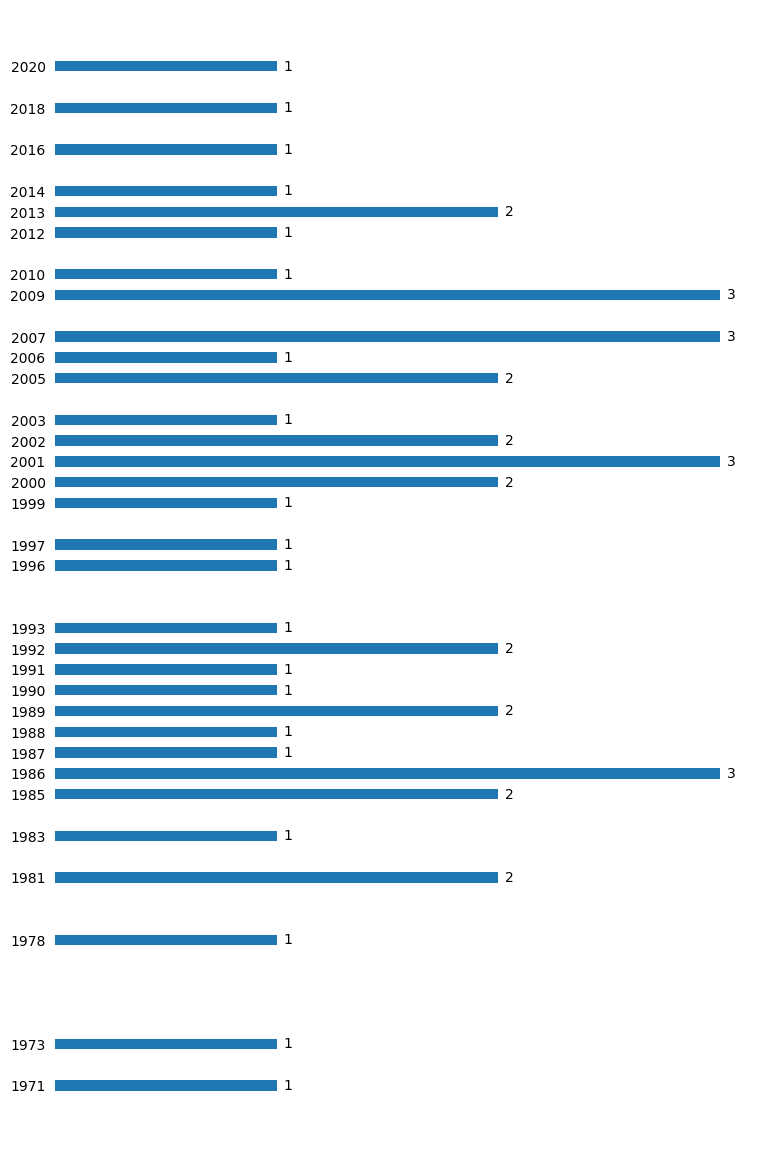

In [14]:
%matplotlib inline
barplot(attempts_per_year)

The most attempts we had in 1986, 2001, 2007, 2009.

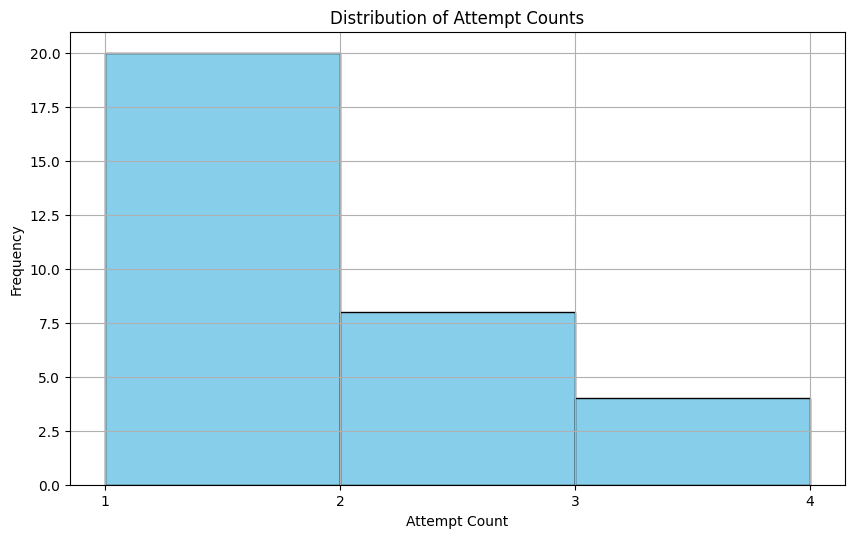

In [18]:
# Extract counts from attempts_per_year
counts = [entry[1] for entry in attempts_per_year]

# Define bins (ranges) for grouping the data
bins = range(min(counts), max(counts) + 2)  # Adjust bins as needed

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(counts, bins=bins, edgecolor='black', color='skyblue')

plt.title('Distribution of Attempt Counts')
plt.xlabel('Attempt Count')
plt.ylabel('Frequency')

plt.xticks(bins)  # Optional: Ensure all bins are shown on x-axis
plt.grid(True)

plt.show()

Attemps by country:

In [19]:
countries_frequency = df["Country"].value_counts()

In [20]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Greece,4
Belgium,4
Canada,4
United Kingdom,2
Australia,2
Brazil,2
Italy,1
Mexico,1


In [25]:
print(data)

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)'], [1983, 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan'], [1985, 'Perry Correctional Institution, Pelzer, South Carolina', 'United States', 'Yes', 'James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith'], [1985, 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil', 'Yes', 'José Carlos dos Reis Encina, a.k.a. "Escadinha"'], [1986, 'Prison de la Santé', 'France', 'Yes', 'Michel Vaujour'], [1986, 'Federal Correct

In [26]:
# Dictionary to store counts by country
country_counts = {}

# Count occurrences of 'Yes' and 'No' grouped by country
for entry in data:
    country = entry[2]  # Country is at index 2 in each entry
    status = entry[3]   # Status ('Yes' or 'No') is at index 3
    if country in country_counts:
        if status == 'Yes':
            country_counts[country]['Yes'] += 1
        elif status == 'No':
            country_counts[country]['No'] += 1
    else:
        if status == 'Yes':
            country_counts[country] = {'Yes': 1, 'No': 0}
        elif status == 'No':
            country_counts[country] = {'Yes': 0, 'No': 1}

In [27]:
print(country_counts)

{'Mexico': {'Yes': 1, 'No': 0}, 'Ireland': {'Yes': 1, 'No': 0}, 'United States': {'Yes': 6, 'No': 2}, 'France': {'Yes': 11, 'No': 4}, 'Canada': {'Yes': 3, 'No': 1}, 'Australia': {'Yes': 1, 'No': 1}, 'Brazil': {'Yes': 2, 'No': 0}, 'Italy': {'Yes': 1, 'No': 0}, 'United Kingdom': {'Yes': 1, 'No': 1}, 'Puerto Rico': {'Yes': 1, 'No': 0}, 'Chile': {'Yes': 1, 'No': 0}, 'Netherlands': {'Yes': 0, 'No': 1}, 'Greece': {'Yes': 2, 'No': 2}, 'Belgium': {'Yes': 2, 'No': 2}, 'Russia': {'Yes': 1, 'No': 0}}


In [28]:
# Dictionary to store counts of helicopter prison breaks by country
helicopter_breaks = {}

# Iterate through data to count helicopter prison breaks by country
for entry in data:
    country = entry[2]  # Country is at index 2 in each entry
    if entry[3] == 'Yes':  # Check if the escape was successful
        if country in helicopter_breaks:
            helicopter_breaks[country] += 1
        else:
            helicopter_breaks[country] = 1

# Print countries with higher chances of successful helicopter prison breaks
for country, count in sorted(helicopter_breaks.items(), key=lambda item: item[1], reverse=True):
    print(f'Country: {country}, Number of successful helicopter prison breaks: {count}')

Country: France, Number of successful helicopter prison breaks: 11
Country: United States, Number of successful helicopter prison breaks: 6
Country: Canada, Number of successful helicopter prison breaks: 3
Country: Brazil, Number of successful helicopter prison breaks: 2
Country: Greece, Number of successful helicopter prison breaks: 2
Country: Belgium, Number of successful helicopter prison breaks: 2
Country: Mexico, Number of successful helicopter prison breaks: 1
Country: Ireland, Number of successful helicopter prison breaks: 1
Country: Italy, Number of successful helicopter prison breaks: 1
Country: United Kingdom, Number of successful helicopter prison breaks: 1
Country: Puerto Rico, Number of successful helicopter prison breaks: 1
Country: Chile, Number of successful helicopter prison breaks: 1
Country: Australia, Number of successful helicopter prison breaks: 1
Country: Russia, Number of successful helicopter prison breaks: 1
